<a href="https://colab.research.google.com/github/JamesChung821/python/blob/master/%E3%80%8CHough_transform_example_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alex Belianinov
#Sandia National Laboratory
# Ion Beam Laboratory 

### Hough Transform Example
* OpenCV function, cv2.HoughLines simply returns an array of (\rho, \theta) values. \rho is measured in pixels and \theta is measured in radians. 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10] #figure size

--2021-07-24 18:50:33--  https://drive.google.com/u/0/uc?id=1Jadks8K13iy4VMmSKL0t9f4mU5HojcL-
Resolving drive.google.com (drive.google.com)... 173.194.192.100, 173.194.192.102, 173.194.192.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.192.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6lo4lkbg3e3n6sf323pgrkku84bb2a7j/1627152600000/06954711203411773855/*/1Jadks8K13iy4VMmSKL0t9f4mU5HojcL- [following]
--2021-07-24 18:50:33--  https://doc-0k-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6lo4lkbg3e3n6sf323pgrkku84bb2a7j/1627152600000/06954711203411773855/*/1Jadks8K13iy4VMmSKL0t9f4mU5HojcL-
Resolving doc-0k-2k-docs.googleusercontent.com (doc-0k-2k-docs.googleusercontent.com)... 142.250.152.132, 2607:f8b0:4001:c56::84
Connecting to doc-0k-2k-docs.googleusercontent.com (doc-0k-2k-docs.googleusercontent.co

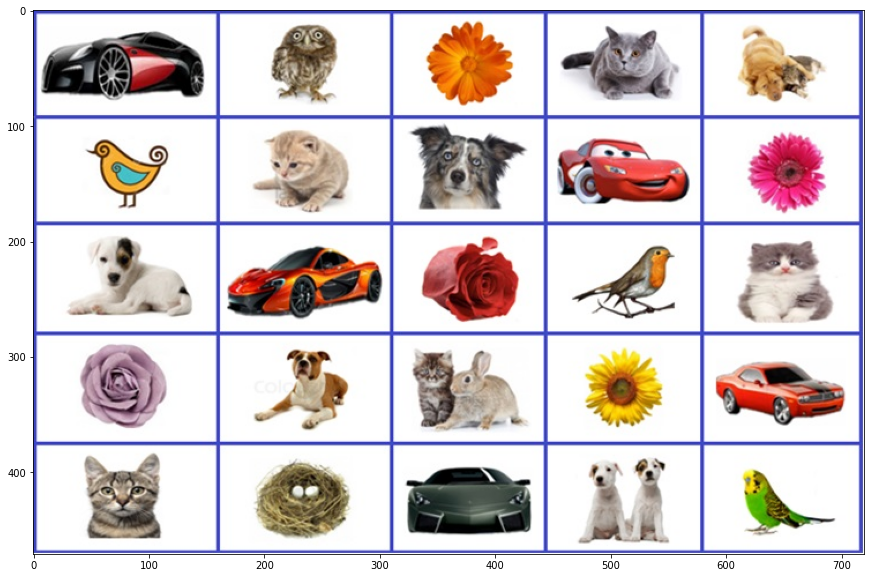

In [ ]:
!wget -O random_image.jpg https://drive.google.com/u/0/uc?id=1Jadks8K13iy4VMmSKL0t9f4mU5HojcL-&export=download
img = cv2.imread('random_image.jpg') #pull in the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,30,90,apertureSize = 3) #use canny to get the edges in the image

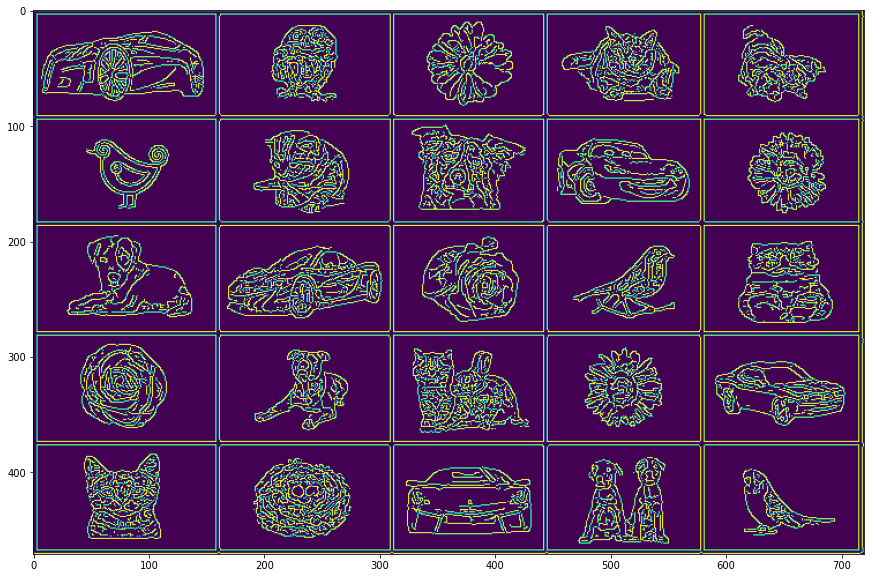

In [ ]:
plt.imshow(edges)

In [ ]:
lines = cv2.HoughLines(edges, 1,np.pi/180,200)
for rho,theta in lines[:,0,:]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    img = cv2.line(img,(x1,y1),(x2,y2),(0,0,0),2) #make a bunch of lines using the above constraints

cv2.imwrite('houghlines3.jpg',img) #write the new image

True

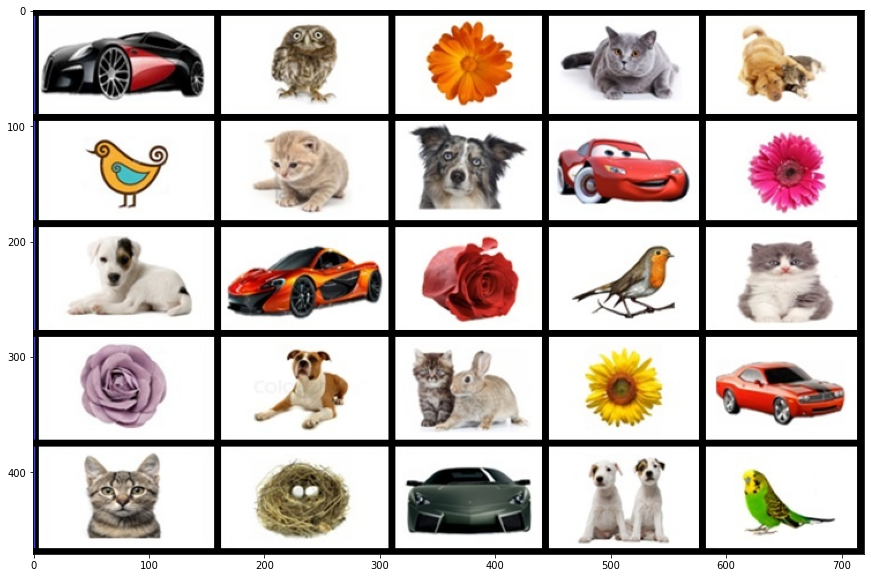

In [ ]:
img_out = cv2.imread('houghlines3.jpg') #read in the new image
plt.imshow(cv2.cvtColor(img_out,cv2.COLOR_BGR2RGB))